# EDA



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
from google.colab import drive

In [2]:
warnings.filterwarnings('ignore')

**csv 파일을 불러와줍니다.**

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/data/vgames2.csv', index_col = 0)

In [5]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
1,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
2,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
3,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
4,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
5,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


**결측값이 있는 칼럼의 결측값 개수를 파악해줍니다.**

In [6]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [7]:
df[df['Year'].isnull()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
32,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
110,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
274,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01
359,Majesty 2: The Fantasy Kingdom Sim,X360,NaN,Simulation,Unknown,0.03,0,0,0
431,Famista 64,N64,NaN,Sports,Namco Bandai Games,0,0,0.17,0.03
...,...,...,...,...,...,...,...,...,...
16241,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0,0,0
16276,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0M,0.03
16279,Madden NFL 11,Wii,NaN,Sports,Unknown,0.7,0,0,50K
16426,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0,0,0


In [8]:
df[df['Genre'].isnull()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
51,Ape Escape: On the Loose,PSP,2005.0,NaN,Sony Computer Entertainment,0.52,0.01,0.12,0.05
409,NBA Ballers,XB,2004.0,NaN,Midway Games,0.37,0.11,0,0.02
1329,NFL Street,XB,2004.0,NaN,Electronic Arts,0.49,0.15,0,0.02
1583,SingStar Singalong With Disney,PS2,2008.0,NaN,Sony Computer Entertainment,0,0.04,0,0.57
1972,Pokemon X/Pokemon Y,3DS,2013.0,NaN,Nintendo,5170K,4.05,4.34,0.79
2044,NASCAR Racing,PS,1996.0,NaN,Pioneer LDC,0.23,0.16,0,0.03
2498,Jurassic Park III: Island Attack,GBA,2001.0,NaN,Konami Digital Entertainment,0.13,0.05,0,0
3354,The Godfather: Dons Edition,PS3,2007.0,NaN,Electronic Arts,0.25,0.02,0,0.03
3364,Ski-Doo Snowmobile Challenge,X360,2009.0,NaN,Valcon Games,0.03,0,0,0
3471,Batman Beyond: Return of the Joker,N64,2000.0,NaN,Ubisoft,0.07,0.02,0,0


In [9]:
df[df['Year'].isnull()]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
32,Rock Band,X360,NaN,Misc,Electronic Arts,1.93,0.34,0,0.21
110,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,NaN,Racing,Unknown,0,0,0.02,0
274,Jewel Link Chronicles: Mountains of Madness,DS,NaN,Puzzle,Avanquest,0,0.06,0,0.01
359,Majesty 2: The Fantasy Kingdom Sim,X360,NaN,Simulation,Unknown,0.03,0,0,0
431,Famista 64,N64,NaN,Sports,Namco Bandai Games,0,0,0.17,0.03
...,...,...,...,...,...,...,...,...,...
16241,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0,0,0
16276,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0M,0.03
16279,Madden NFL 11,Wii,NaN,Sports,Unknown,0.7,0,0,50K
16426,Yoostar on MTV,X360,NaN,Misc,Unknown,0.06,0,0,0


**연도가 1900 이하인 데이터는 명백하게 결측값이므로 제거해줍니다.**

In [10]:
df.drop(df[df['Year'] <= 1900].index, inplace = True)

In [11]:
df[df['Year'] <= 1900]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


In [12]:
df['Year'].min()

1980.0

**Genre가 Platform인 데이터가 있는 row를 제거해줍니다.**

In [13]:
df.drop(df[df['Genre'] == 'Platform'].index, inplace = True)

**결측값이 있는 row를 지워줍니다.**

In [14]:
df.dropna(inplace = True)

In [15]:
df.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [16]:
df.reset_index(drop = True, inplace = True)

**replace 함수를 정의하여 판매량에 들어있는 M, K를 제거 후 numerical하게 변형해줍니다.**

In [17]:
def replace(s):
  for i in range(len(s)):
    if re.search('M', s[i]) != None:
      s[i] = re.sub('M', '', s[i])
      s[i] = float(s[i])

    elif re.search('K', s[i]) != None:
      s[i] = re.sub('K', '', s[i])
      s[i] = float(s[i]) * 0.001

    else:
      s[i] = float(s[i])
  
  s = pd.to_numeric(s)    
  
  return s

In [18]:
df['NA_Sales'] = replace(df['NA_Sales'])
df['EU_Sales'] = replace(df['EU_Sales'])
df['JP_Sales'] = replace(df['JP_Sales'])
df['Other_Sales'] = replace(df['Other_Sales'])

**모든 지역의 판매량의 합인 Total을 DataFrame에 추가해줍니다.**

In [19]:
df['Total'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

In [20]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0.00,0.00,0.14,0.00,0.14
...,...,...,...,...,...,...,...,...,...,...
15271,Minna no Chizu 2,PSP,2007.0,Misc,Zenrin,0.00,0.00,0.02,0.00,0.02
15272,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0.00,0.00,0.00,0.01
15273,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13,0.79
15274,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03,0.38


# 1. 플랫폼 선호도

**Name : 게임의 이름\
Platform : 게임이 지원되는 플랫폼의 이름\
Year : 게임이 출시된 년도\
Genre : 게임의 장르\
Publisher : 게임을 제작한 회사\
NA_Sales : 북미 지역에서의 출고량\
EU_Sales : 유럽 지역에서의 출고량\
JP_Sales : 일본 지역에서의 출고량\
Other_Sales : 기타 지역에서의 출고량\
Total : 총 출고량**



In [21]:
df.columns

Index(['Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total'],
      dtype='object')

**Platform column을 기준으로 묶은 Total의 총합을 platform DataFrame으로 만들어줍니다.**

In [21]:
platform = pd.DataFrame(df.groupby('Platform')['Total'].sum())

**총 판매량의 합이 1억 장 미만인 데이터를 제거해줍니다.**

In [22]:
platform = platform[platform['Total'] >= 100]
platform.reset_index(drop = False, inplace = True)
platform

,Platform,Total
0,3DS,198.97
1,DS,722.68
2,GB,200.35
3,GBA,226.58
4,GC,167.36
5,N64,180.47
6,NES,155.27
7,PC,251.79
8,PS,659.35
9,PS2,1142.97


**각 플랫폼의 제조사 이름 list인 Maker를 만들어, platform DataFrame에 삽입해줍니다.**

In [23]:
Maker = ['Nintendo', 'Nintendo', 'Nintendo', 'Nintendo', 'Nintendo', 'Nintendo', 'Nintendo', 
         'PC', 'Sony', 'Sony', 'Sony', 'Sony', 'Sony', 'Nintendo', 
         'Nintendo', 'MS-Soft', 'MS-Soft', 'MS-Soft']

In [24]:
platform.insert(1, 'Maker', Maker)
platform

,Platform,Maker,Total
0,3DS,Nintendo,198.97
1,DS,Nintendo,722.68
2,GB,Nintendo,200.35
3,GBA,Nintendo,226.58
4,GC,Nintendo,167.36
5,N64,Nintendo,180.47
6,NES,Nintendo,155.27
7,PC,PC,251.79
8,PS,Sony,659.35
9,PS2,Sony,1142.97


In [25]:
maker_sum = pd.DataFrame(platform.groupby('Maker').sum())
maker_sum.reset_index(drop = False, inplace = True)

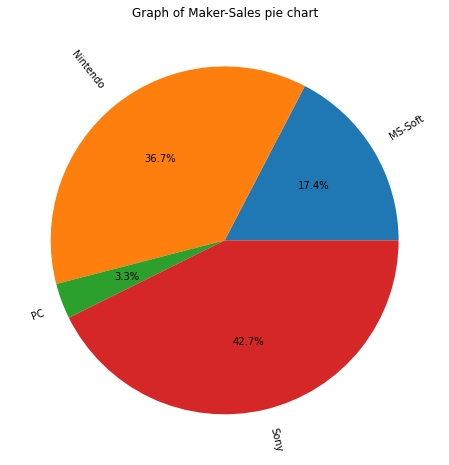

In [26]:
plt.figure(figsize = (8, 8))
plt.pie(maker_sum['Total'], labels = maker_sum['Maker'], rotatelabels = True, autopct = '%.1f%%')
plt.title('Graph of Maker-Sales pie chart')
plt.show()

# 2. 지역에 따라서 선호하는 게임 장르가 다를까

**Genre 를 기준으로 각각 Genre의 게임 판매량의 합을 지역별로 구하고, 이를 DataFrame으로 만들어줍니다.**

In [27]:
na_sum = pd.DataFrame(df.groupby('Genre')['NA_Sales'].sum())
eu_sum = pd.DataFrame(df.groupby('Genre')['EU_Sales'].sum())
jp_sum = pd.DataFrame(df.groupby('Genre')['JP_Sales'].sum())
other_sum = pd.DataFrame(df.groupby('Genre')['Other_Sales'].sum())

In [28]:
na_sum.reset_index(drop = False, inplace = True)
eu_sum.reset_index(drop = False, inplace = True)
jp_sum.reset_index(drop = False, inplace = True)
other_sum.reset_index(drop = False, inplace = True)

**만들어진 각각의 DataFrame들을 Genre column 기준으로 inner join 해줍니다.**

In [29]:
inner1 = pd.merge(na_sum, eu_sum, left_on = 'Genre', right_on = 'Genre', how = 'inner')
inner2 = pd.merge(inner1, jp_sum, left_on = 'Genre', right_on = 'Genre', how = 'inner')
inner3 = pd.merge(inner2, other_sum, left_on = 'Genre', right_on = 'Genre', how = 'inner')

**각 장르의 판매량의 합인 Total을 생성하여 DataFrame에 삽입해줍니다.**

In [30]:
inner3['Total'] = inner3['NA_Sales'] + inner3['EU_Sales'] + inner3['JP_Sales'] + inner3['Other_Sales']
inner3

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
0,Action,855.96,512.52,155.73,183.64,1707.85
1,Adventure,101.33,63.32,51.79,16.64,233.08
2,Fighting,220.11,99.72,86.39,36.10,442.32
3,Misc,394.29,207.68,103.71,72.54,778.22
4,Puzzle,121.00,50.39,56.19,12.39,239.97
5,Racing,353.57,234.20,55.42,76.23,719.42
6,Role-Playing,307.08,176.31,336.25,54.71,874.35
7,Shooter,570.89,307.26,37.34,100.82,1016.31
8,Simulation,181.04,112.68,63.46,31.24,388.42
9,Sports,664.33,369.69,134.58,131.73,1300.33


**total을 기준으로 내림차순 정렬을 한 결과, Action이 가장 인기 많은 Genre의 게임인 것을 파악할 수 있습니다.**

In [31]:
inner3.sort_values(by = 'Total', ascending = False)

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
0,Action,855.96,512.52,155.73,183.64,1707.85
9,Sports,664.33,369.69,134.58,131.73,1300.33
7,Shooter,570.89,307.26,37.34,100.82,1016.31
6,Role-Playing,307.08,176.31,336.25,54.71,874.35
3,Misc,394.29,207.68,103.71,72.54,778.22
5,Racing,353.57,234.20,55.42,76.23,719.42
2,Fighting,220.11,99.72,86.39,36.10,442.32
8,Simulation,181.04,112.68,63.46,31.24,388.42
4,Puzzle,121.00,50.39,56.19,12.39,239.97
1,Adventure,101.33,63.32,51.79,16.64,233.08


**Pie chart를 통해 시각화 한 결과, \
NA, EU, Other는 Action, Sports, Shooter순, \
JP는 Role Playing, Action, Sports 순으로 선호도가 높은 것으로 밝혀졌습니다.**


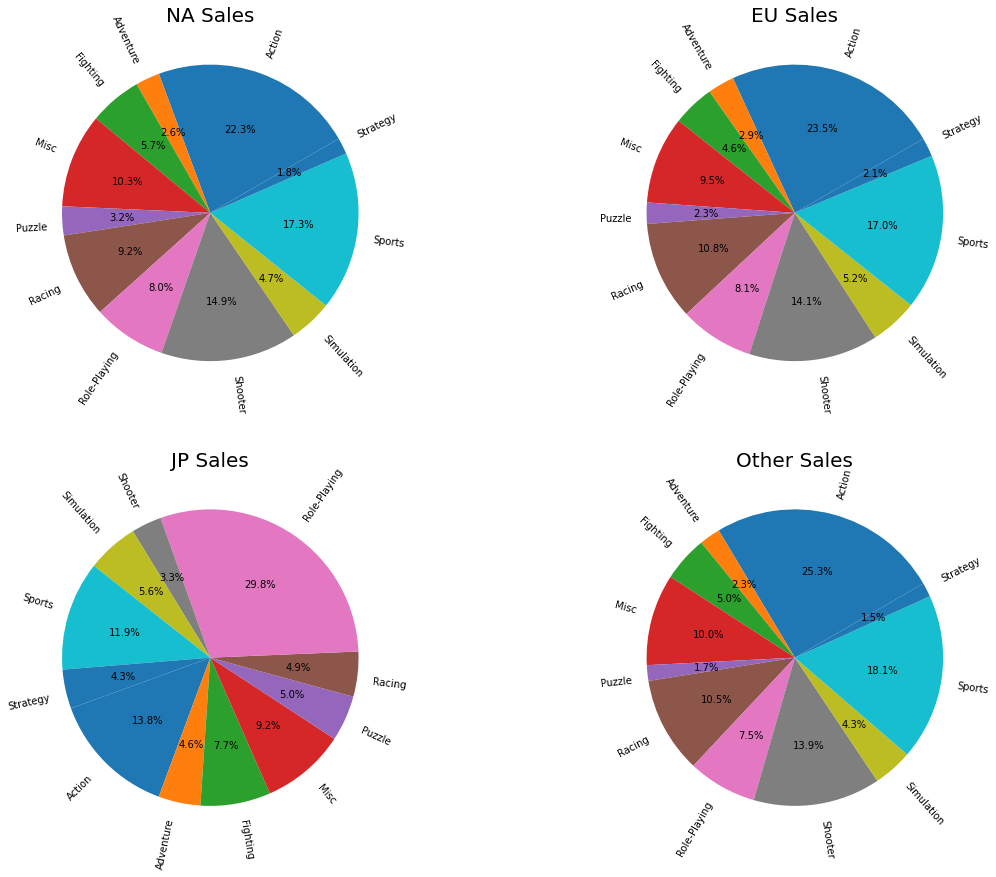

In [32]:
f, axes = plt.subplots(2, 2)

f.set_size_inches((20, 15))

plt.subplots_adjust(wspace = 0.1, hspace = 0.2)

axes[0, 0].pie(inner3['NA_Sales'], labels = inner3['Genre'], rotatelabels = True, startangle = 30, autopct = '%.1f%%')
axes[0, 0].set_title('NA Sales', fontsize = 20)

axes[0, 1].pie(inner3['EU_Sales'], labels = inner3['Genre'], rotatelabels = True, startangle = 30, autopct = '%.1f%%')
axes[0, 1].set_title('EU Sales', fontsize = 20)


axes[1, 0].pie(inner3['JP_Sales'], labels = inner3['Genre'], rotatelabels = True, startangle = 200, autopct = '%.1f%%')
axes[1, 0].set_title('JP Sales', fontsize = 20)

axes[1, 1].pie(inner3['Other_Sales'], labels = inner3['Genre'], rotatelabels = True, startangle = 30, autopct = '%.1f%%')
axes[1, 1].set_title('Other Sales', fontsize = 20)

plt.show()

# 3. 연도별 게임의 트렌드가 있을까

**1980년 부터 2020년 까지 Genre를 기준으로 10년 단위로 묶은 DataFrame 생성, inner join합니다.**

In [33]:
def decade(s, old, new):
  s = df[(old <= df['Year']) & (df['Year'] < new)]
  a = pd.DataFrame(s.groupby('Genre')['Year'].count())

  return a

In [34]:
df_80s = []
df_90s = []
df_00s = [] 
df_10s = []

In [35]:
sum_80s = decade(df_80s, 1980, 1990)
sum_90s = decade(df_90s, 1990, 2000)
sum_00s = decade(df_00s, 2000, 2010)
sum_10s = decade(df_10s, 2010, 2021)

In [36]:
inner4 = pd.merge(sum_80s, sum_90s, left_on = 'Genre', right_on = 'Genre', how = 'inner')
inner5 = pd.merge(inner4, sum_00s, left_on = 'Genre', right_on = 'Genre', how = 'inner')
inner6 = pd.merge(inner5, sum_10s, left_on = 'Genre', right_on = 'Genre', how = 'inner')

In [37]:
inner6.columns = ['1980s', '1990s', '2000s', '2010s']

In [38]:
inner6.reset_index(drop = False, inplace = True)
inner6

,Genre,1980s,1990s,2000s,2010s
0,Action,66,158,1573,1429
1,Adventure,2,96,629,537
2,Fighting,4,191,440,194
3,Misc,8,115,991,557
4,Puzzle,19,71,356,112
5,Racing,8,179,791,231
6,Role-Playing,9,171,728,549
7,Shooter,30,136,712,390
8,Simulation,3,86,547,205
9,Sports,22,303,1397,567


**Pie chart를 통해 시각화 해 본 결과, 90년대를 제외하곤 모두 Action 장르가 트렌드 리더였습니다.**

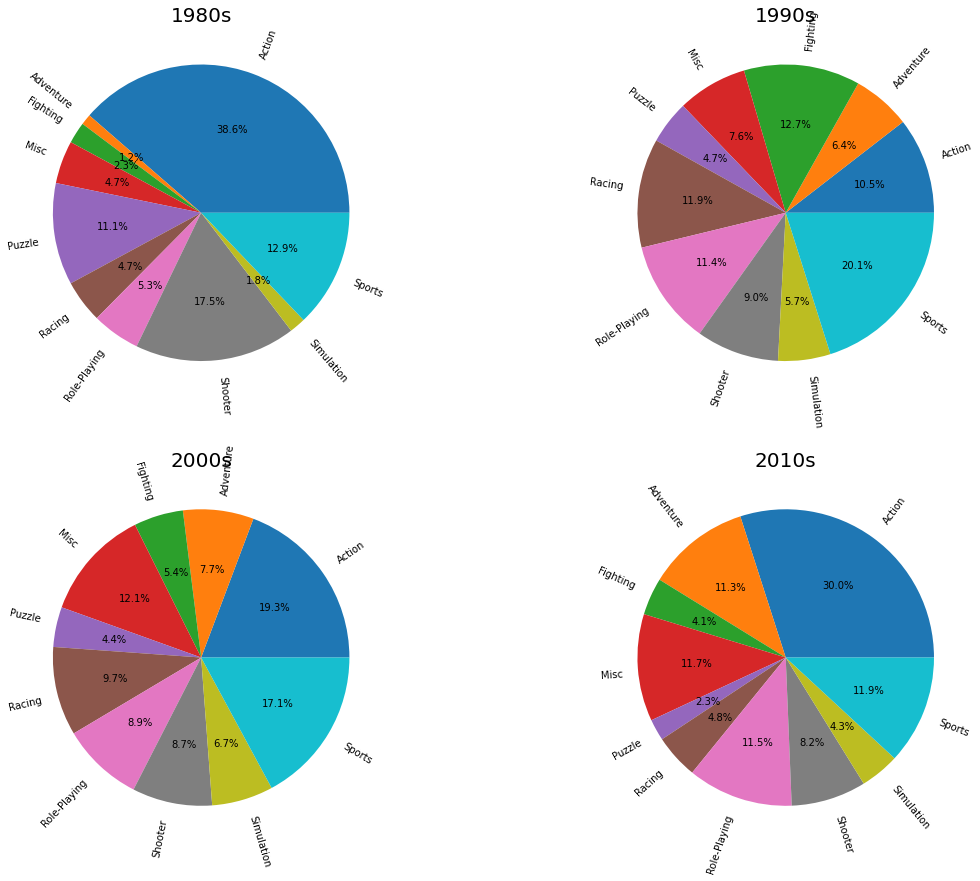

In [39]:
f, axes = plt.subplots(2, 2)

f.set_size_inches((20, 15))

plt.subplots_adjust(wspace = 0.1, hspace = 0.2)

axes[0, 0].pie(inner6['1980s'], labels = inner6['Genre'], rotatelabels = True, autopct = '%.1f%%')
axes[0, 0].set_title('1980s', fontsize = 20)

axes[0, 1].pie(inner6['1990s'], labels = inner6['Genre'], rotatelabels = True, autopct = '%.1f%%')
axes[0, 1].set_title('1990s', fontsize = 20)


axes[1, 0].pie(inner6['2000s'], labels = inner6['Genre'], rotatelabels = True, autopct = '%.1f%%')
axes[1, 0].set_title('2000s', fontsize = 20)

axes[1, 1].pie(inner6['2010s'], labels = inner6['Genre'], rotatelabels = True, autopct = '%.1f%%')
axes[1, 1].set_title('2010s', fontsize = 20)

plt.show()


# 4. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

**Action 장르의 Total을 기준으로 내림차순 정렬하여, 판매량이 가장 높은 게임 5가지를 출력합니다.\
판매량 상위 5위까지 모두 GTA 시리즈가 차지하였습니다.**

In [40]:
head = df[df['Genre'] == 'Action'].sort_values(by = 'Total', ascending = False).head()
head

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
3204,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
13491,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
10046,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
4906,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
9010,Grand Theft Auto III,PS2,2001.0,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10


Text(0.5, 1.0, "Graph of 'GTA' Series sales")

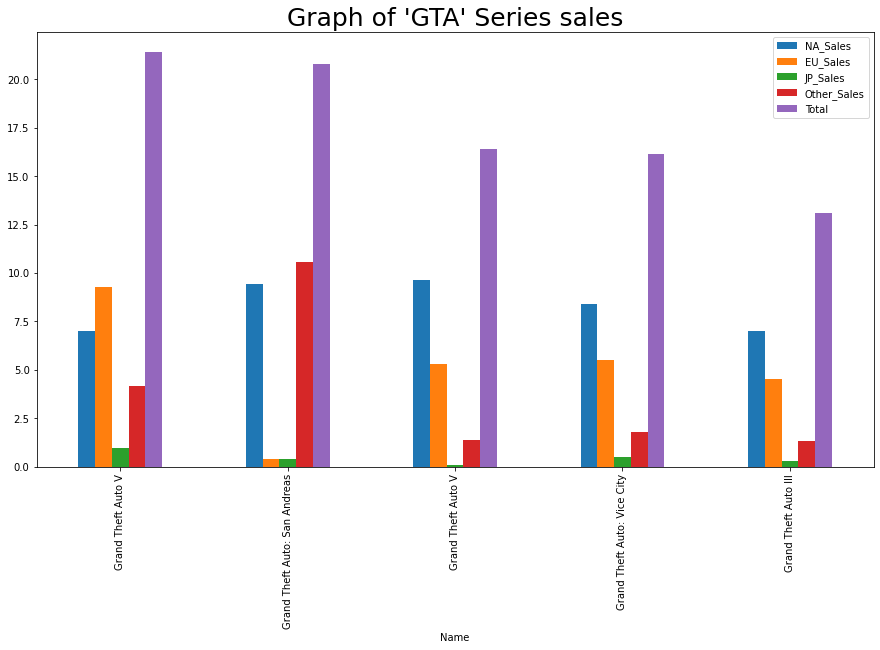

In [41]:
head.plot(x= 'Name', y= ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Total'], kind="bar",figsize=(15,8))
plt.title("Graph of 'GTA' Series sales" , fontsize = 25)